In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/marco/phd/devel/exotic/exotic/')

import os
import math
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from lab import analysis
from lab.simulation import forcings

REF_RESP_PATH = [
    '/home/marco/phd/data/response/lorenz96/rk4/SF_8.0_1.0_0/',
    '/home/marco/phd/data/response/lorenz96/rk4/SF_8.0_-1.0_0/'            
]

SAVE_FIG = False

## Plot cumulative distribution approximation

In [2]:
observable = 'energy'
QUANTILES_PATH = f'/home/marco/phd/data/obs/lorenz96/rk4/CF_8.0/quantiles/obs_lorenz96_rk4_CF_8.0_quantiles_{observable}.nc'

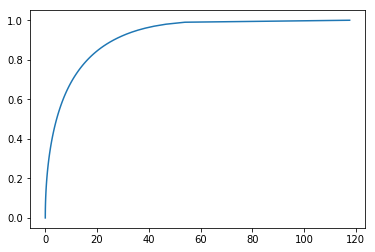

In [3]:
quantiles = xr.open_dataarray(QUANTILES_PATH)
quantiles_df = pd.DataFrame(data={'order': quantiles.quantile_order, 'value': quantiles.values})
display(plt.plot(quantiles_df.value, quantiles_df.order))

In [4]:
force_linear_coefficient = 0.01
deactivation_time = 100
forcing = f'LF_8.0_{force_linear_coefficient}_0_{deactivation_time}'

In [7]:
obs_all = [f"{observable}_below_{format(np.round(quant, 2), '.2f')}q" for quant in np.arange(0, 1.001, 0.01)]
chi_normal = {}
for obs in obs_all:
    response_p1 = xr.open_dataarray(os.path.join(
        REF_RESP_PATH[0],
        observable,
        f'response_lorenz96_rk4_{obs}_SF_8.0_1.0_0.nc'
    ))
    chi_normal[obs] = analysis.compute_susceptibility(response_p1.values.squeeze())
resp_pred_normal = {}
for obs in obs_all:
    resp_pred_normal[obs] = analysis.compute_response(chi_normal[obs], forcings.LinearForcing(
        linear_coefficient=force_linear_coefficient,
        deactivation_time = deactivation_time
    ))

In [12]:
resp_pred_normal_t50 = [resp_pred_normal[obs][5000] for obs in obs_all]
y_pred_t50 = quantiles_df.order.values + resp_pred_normal_t50
resp_pred_normal_t100 = [resp_pred_normal[obs][9999] for obs in obs_all]
y_pred_t100 = quantiles_df.order.values + resp_pred_normal_t100

#### Plot CDF

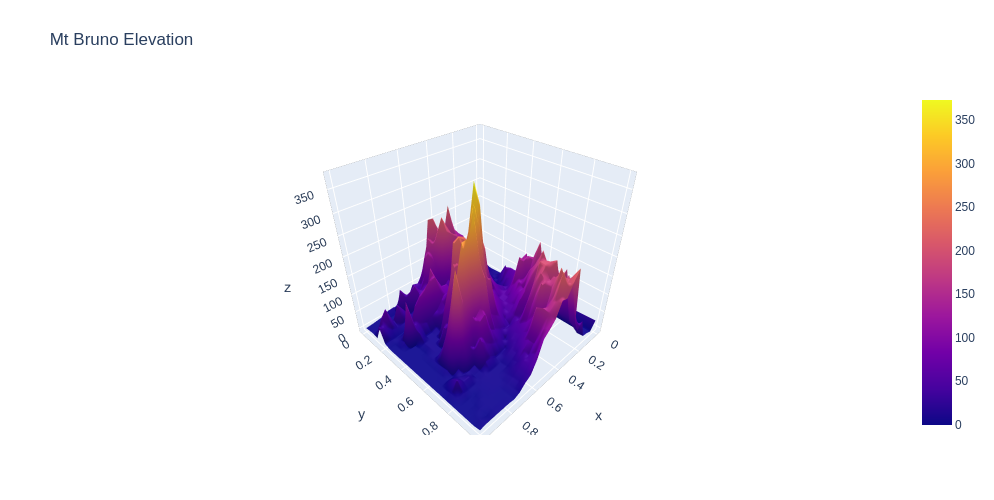

In [13]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()